In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

In [3]:
end = date.today()
start = date(end.year - 20, end.month, end.day)
stock_symbol = 'GOOG'
data = yf.download(stock_symbol, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512
...,...,...,...,...,...,...,...
4982,2024-06-05,176.535004,177.970001,175.289993,177.070007,176.868744,15233900
4983,2024-06-06,177.429993,178.710007,177.210007,178.350006,178.147278,14255800
4984,2024-06-07,178.460007,179.419998,175.789993,175.949997,175.750000,14716300
4985,2024-06-10,176.449997,178.470001,174.380005,176.630005,176.630005,17122200


In [6]:
ma_100_days = data['Close'].ewm(span=100, adjust=False).mean()
#ma = moving average - based on last 100 days predict the price of 101 day

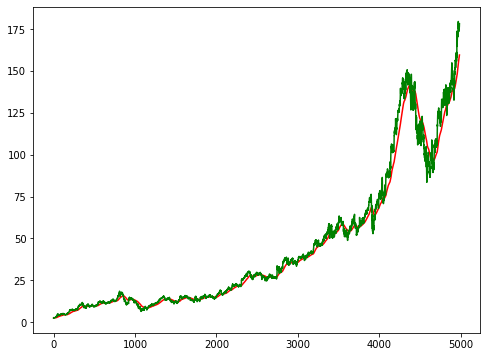

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data['Close'].ewm(span=200, adjust=False).mean()

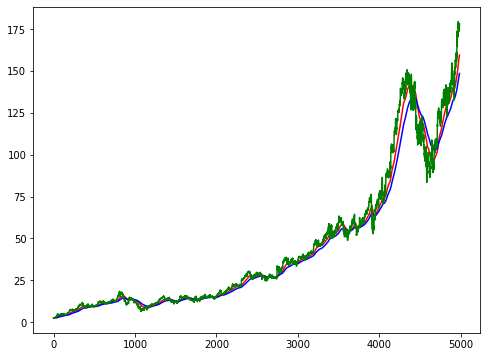

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)* 0.8)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])
#80% is being used to train the model and 20% is being used to test the model

In [12]:
data_train.shape[0], data_test.shape[0]

(3989, 998)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

#scaling the training dataset between 0 and 1

In [15]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])

In [16]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))

#return_sequences = True means that output of one layer will become input for next layer so we dont write it for final layer as there is no next layer to pass it on
#here we are making 4 layers where units define the number of neurons for every layer
#relu is one kind of neural network parameter which will be passed to calculate RNN neural networks
#dropout is used to prevent overfitting , 0.2 define that 20% of the data is malicious 

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1)) #to predict the closing price of the market

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

verbos = 1 is used for priniting of data
batch_size is used to selected number of rows to be used
epochs means number of time the model will get fitted

In [ ]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50

122/122 [==============================] - 28s 157ms/step - loss: 0.0170
Epoch 2/50
122/122 [==============================] - 22s 183ms/step - loss: 0.0050
Epoch 3/50
122/122 [==============================] - 21s 173ms/step - loss: 0.0041
Epoch 4/50
122/122 [==============================] - 21s 172ms/step - loss: 0.0040
Epoch 5/50
122/122 [==============================] - 18s 147ms/step - loss: 0.0035
Epoch 6/50
122/122 [==============================] - 18s 146ms/step - loss: 0.0033
Epoch 7/50
122/122 [==============================] - 20s 162ms/step - loss: 0.0030
Epoch 8/50
122/122 [==============================] - 18s 149ms/step - loss: 0.0031
Epoch 9/50
122/122 [==============================] - 20s 166ms/step - loss: 0.0027
Epoch 10/50
122/122 [==============================] - 24s 193ms/step - loss: 0.0028
Epoch 11/50
122/122 [==============================] - 22s 182ms/step - loss: 0.0024
Epoch 12/50
122/122 [==============================] - 32s 263ms/step - l

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [ ]:
past_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

32/32 [==============================] - 5s 45ms/step


In [ ]:
scale = 1/scaler.scale_

In [ ]:
y_predict = y_predict * scale

In [ ]:
y = y * scale

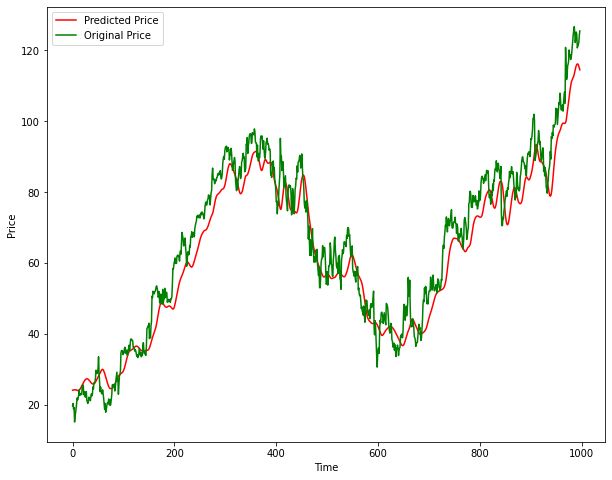

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
model.save("Stock Prediction Model.keras")

NameError: name 'model' is not defined